In [1]:
import mpldatacursor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
from ciexyz import xyz_from_spectrum
from colormodels import irgb_from_xyz
import csv

In [2]:
wavel_file = pd.read_csv('long_de_onda_1_tira.csv')
inten_file = pd.read_csv('inten_paso_500micrones.csv')
wavel_array = wavel_file.iloc[:,0:].values
inten_array = inten_file.iloc[:,0:].values

In [83]:
wavel_array,inten_array

(array([[ 192.95730947],
        [ 193.16105095],
        [ 193.36480884],
        ...,
        [1024.31173182],
        [1024.55859777],
        [1024.80547097]]),
 array([[ 3.51400601e-04,  2.12575867e-04,  3.84072211e-04, ...,
         -4.86084114e-05, -1.99674647e-04,  1.83994254e-04],
        [ 1.64002617e-04, -1.54470580e-04,  3.96664207e-04, ...,
         -4.32060174e-04, -6.27995326e-04, -1.01373457e-04],
        [ 5.91333159e-04, -2.78343540e-04,  2.11649965e-04, ...,
         -8.94909412e-04, -6.45826379e-04, -8.54111022e-04],
        ...,
        [ 3.64981493e-04, -2.43516253e-04,  1.52737569e-04, ...,
          3.77162854e-04, -4.51630758e-04, -2.63900830e-04],
        [ 1.85056813e-04, -6.92893452e-04,  4.05489090e-04, ...,
         -2.32703377e-05, -6.72382337e-04, -7.33653444e-04],
        [ 2.69304072e-04, -4.69621591e-04,  5.51131494e-04, ...,
          1.79540947e-04, -4.08389219e-04, -3.27057577e-05]]))

In [23]:
def pre_RGB_calc():
    wavel_file = pd.read_csv('long_de_onda_1_tira.csv')
    inten_file = pd.read_csv('inten_paso_500micrones.csv')
    wavel_array = wavel_file.iloc[:,0:].values
    inten_array = inten_file.iloc[:,0:].values

    list_of_colors = []

    for row in range(len(inten_array)):
        spectra = np.column_stack((wavel_array,inten_array[row,:]))
        xyz_color_vec = xyz_from_spectrum(spectra)
        # print(np.shape(spectrum))
        rgb_disp = irgb_from_xyz(xyz_color_vec)
        list_of_colors.append(rgb_disp)
        
    #rgb_matrix = np.asarray(list_of_colors)
    
    with open('RGB_colors.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(rgb_matrix)
        
    csvFile.close()
    

In [24]:
from line_profiler import LineProfiler
lp = LineProfiler()
lp_wrapper = lp(pre_RGB_calc)
lp_wrapper()
lp.print_stats()

Timer unit: 5.14057e-07 s

Total time: 20.4544 s
File: <ipython-input-23-e3e9678bb3de>
Function: pre_RGB_calc at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def pre_RGB_calc():
     2         1      29918.0  29918.0      0.1      wavel_file = pd.read_csv('long_de_onda_1_tira.csv')
     3         1    1941000.0 1941000.0      4.9      inten_file = pd.read_csv('inten_paso_500micrones.csv')
     4         1        599.0    599.0      0.0      wavel_array = wavel_file.iloc[:,0:].values
     5         1        469.0    469.0      0.0      inten_array = inten_file.iloc[:,0:].values
     6                                           
     7         1          2.0      2.0      0.0      list_of_colors = []
     8                                           
     9       729        654.0      0.9      0.0      for row in range(len(inten_array)):
    10       728      68311.0     93.8      0.2          spectra = np.column_st

In [30]:
def func():
    
    wavel_file = pd.read_csv('long_de_onda_1_tira.csv')
    inten_file = pd.read_csv('inten_paso_500micrones.csv')
    RGB_file = pd.read_csv('RGB_colors.csv')
    #wavel_array = wavel_file.iloc[:,0:].values
    #inten_array = inten_file.iloc[:,0:].values
    R_array = RGB_file.iloc[:,0].values
    G_array = RGB_file.iloc[:,1].values
    B_array = RGB_file.iloc[:,2].values

    fig = plt.figure()
    #rgb_matrix = np.asarray(list_of_colors)
    Z1 = np.vstack([R_array, G_array, B_array])
    im = plt.imshow(np.dstack(Z1), interpolation='none', aspect='auto',extent=[0.0, 13.0, 0, 13.0])
    # plt.colorbar(im, orientation='horizontal')
    #mpldatacursor.datacursor(hover=True, bbox=dict(alpha=1, fc='w'))
    plt.show()

In [31]:
from line_profiler import LineProfiler
lp = LineProfiler()
lp_wrapper = lp(func)
lp_wrapper()
lp.print_stats()

Timer unit: 5.14057e-07 s

Total time: 1.06867 s
File: <ipython-input-30-3a22a38f435c>
Function: func at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def func():
     2                                               
     3         1      34000.0  34000.0      1.6      wavel_file = pd.read_csv('long_de_onda_1_tira.csv')
     4         1    1932445.0 1932445.0     93.0      inten_file = pd.read_csv('inten_paso_500micrones.csv')
     5         1       4815.0   4815.0      0.2      RGB_file = pd.read_csv('RGB_colors.csv')
     6                                               #wavel_array = wavel_file.iloc[:,0:].values
     7                                               #inten_array = inten_file.iloc[:,0:].values
     8         1        326.0    326.0      0.0      R_array = RGB_file.iloc[:,0].values
     9         1        217.0    217.0      0.0      G_array = RGB_file.iloc[:,1].values
    10         1        209.0

In [57]:
wavel_file = pd.read_csv('long_de_onda_1_tira.csv')
inten_file = pd.read_csv('inten_paso_500micrones.csv')
wavel_array = wavel_file.iloc[:,0:].values
inten_array = inten_file.iloc[:,0:].values

In [58]:
len(inten_array)

728

In [62]:
dx = 0.5 #en micrones, luego son pasados a mm
dy = 0.5
x_array = np.arange(0.0,dx*(26+1),dx)
y_array = np.arange(0.0,dy*(26+1),dy)


x_positions = []
y_positions = []

for ndx, y in enumerate(y_array):
    if ndx % 2:
        for x in reversed(x_array):
            x_positions.append(x)
            y_positions.append(y)
    else:
        for x in x_array:
            x_positions.append(x)
            y_positions.append(y)

x_positions.pop()
y_positions.pop()
print(len(x_positions))


with open("xy_positions.csv", "w") as csv_file:   
    writer = csv.writer(csv_file, delimiter=',')
    level_counter = 0
    max_levels = len(x_positions)
    while level_counter < max_levels:
        writer.writerow((x_positions[level_counter], y_positions[level_counter])) 
        level_counter = level_counter +1


728


In [16]:
from plots import spectrum_subplot
wavel_file = pd.read_csv('long_de_onda_1_tira.csv')
inten_file = pd.read_csv('inten_paso_500micrones.csv')
wavel_array = wavel_file.iloc[:,0:].values
inten_array = inten_file.iloc[:,0:].values

In [21]:
len(inten_array)

728

[array([ 192.95730947,  193.16105095,  193.36480884, ..., 1024.31173182,
        1024.55859777, 1024.80547097])]

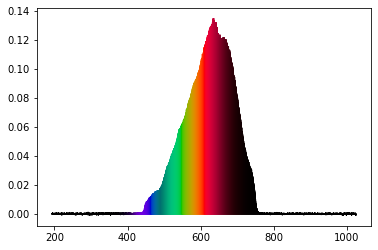

In [18]:
wavels = []
intens = []

for eachline in range(1):
    spectrum = np.column_stack((wavel_array,np.transpose(inten_array[eachline,:])))
    w,I = spectrum_subplot(spectrum)
    wavels.append(w)
    intens.append(I)
wavels

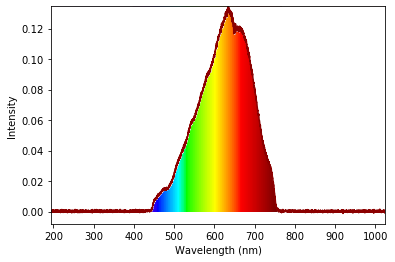

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors


def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

#fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

wavelengths = wavel_array[:,0]
spectrum = np.transpose(inten_array[10,:])
plt.plot(wavel_array, spectrum, color='darkred')

y = np.linspace(0, np.max(spectrum), 100)
X,Y = np.meshgrid(wavelengths, y)

extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

plt.fill_between(wavelengths, spectrum, np.max(spectrum), color='w')

plt.show()

KeyboardInterrupt: 

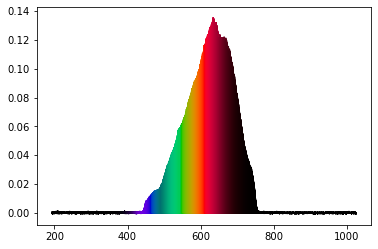

In [32]:
wavels = []
intens = []


for eachline in range(len(inten_array)):
    spectrum = np.column_stack((wavel_array,np.transpose(inten_array[eachline,:])))
    w,I = spectrum_subplot(spectrum)
    wavels.append(w)
    intens.append(I)

with open("spectra.csv", "w") as csv_file:   
    writer = csv.writer(csv_file, delimiter=',')
    level_counter = 0
    max_levels = len(wavels)
    while level_counter < max_levels:
        writer.writerow((wavels[level_counter], intens[level_counter])) 
        level_counter = level_counter +1

csv_file.close()

Timer unit: 5.14057e-07 s

Total time: 41.5707 s
File: <ipython-input-29-4a66f5c58062>
Function: test at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def test():
     6                                           
     7         3         31.0     10.3      0.0      for eachline in range(2):
     8         2       1706.0    853.0      0.0          spectrum = np.column_stack((wavel_array,np.transpose(inten_array[eachline,:])))
     9         2   80862809.0 40431404.5    100.0          w,I = spectrum_subplot(spectrum)
    10         2          9.0      4.5      0.0          wavels.append(w)
    11         2          4.0      2.0      0.0          intens.append(I)
    12                                           
    13         1        705.0    705.0      0.0      with open("spectra.csv", "w") as csv_file:   
    14         1         10.0     10.0      0.0          writer = csv.writer(csv_file, delimiter=',')
    15

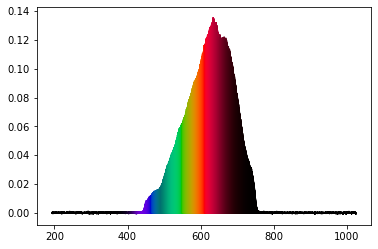

In [31]:
from line_profiler import LineProfiler
lp = LineProfiler()
lp_wrapper = lp(test)
lp_wrapper()
lp.print_stats()

In [63]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [66]:
xy_pos_file = pd.read_csv('xy_positions.csv')
xy_pos_file.head()

,0.0,0.0.1
0,0.5,0.0
1,1.0,0.0
2,1.5,0.0
3,2.0,0.0
4,2.5,0.0


In [73]:
mouse_pos = xy_pos_file[(xy_pos_file.iloc[:, 0] == 0.0) & (xy_pos_file.iloc[:, 1] == 0.0)].index.tolist()
print(mouse_pos)

[]


In [78]:
wavel_file = pd.read_csv('long_de_onda_1_tira.csv')
inten_file = pd.read_csv('inten_paso_500micrones.csv')
plt.plot(wavel_file.iloc[:, 0], inten_file.iloc[0,:].transpose(), '*')
#inten_file.iloc[mouse_pos,:]

In [61]:
for element in range(len(x_positions)):
    print(x_positions[element],y_positions[element])

0.0 0.0
0.5 0.0
1.0 0.0
1.5 0.0
2.0 0.0
2.5 0.0
3.0 0.0
3.5 0.0
4.0 0.0
4.5 0.0
5.0 0.0
5.5 0.0
6.0 0.0
6.5 0.0
7.0 0.0
7.5 0.0
8.0 0.0
8.5 0.0
9.0 0.0
9.5 0.0
10.0 0.0
10.5 0.0
11.0 0.0
11.5 0.0
12.0 0.0
12.5 0.0
13.0 0.0
13.0 0.5
12.5 0.5
12.0 0.5
11.5 0.5
11.0 0.5
10.5 0.5
10.0 0.5
9.5 0.5
9.0 0.5
8.5 0.5
8.0 0.5
7.5 0.5
7.0 0.5
6.5 0.5
6.0 0.5
5.5 0.5
5.0 0.5
4.5 0.5
4.0 0.5
3.5 0.5
3.0 0.5
2.5 0.5
2.0 0.5
1.5 0.5
1.0 0.5
0.5 0.5
0.0 0.5
0.0 1.0
0.5 1.0
1.0 1.0
1.5 1.0
2.0 1.0
2.5 1.0
3.0 1.0
3.5 1.0
4.0 1.0
4.5 1.0
5.0 1.0
5.5 1.0
6.0 1.0
6.5 1.0
7.0 1.0
7.5 1.0
8.0 1.0
8.5 1.0
9.0 1.0
9.5 1.0
10.0 1.0
10.5 1.0
11.0 1.0
11.5 1.0
12.0 1.0
12.5 1.0
13.0 1.0
13.0 1.5
12.5 1.5
12.0 1.5
11.5 1.5
11.0 1.5
10.5 1.5
10.0 1.5
9.5 1.5
9.0 1.5
8.5 1.5
8.0 1.5
7.5 1.5
7.0 1.5
6.5 1.5
6.0 1.5
5.5 1.5
5.0 1.5
4.5 1.5
4.0 1.5
3.5 1.5
3.0 1.5
2.5 1.5
2.0 1.5
1.5 1.5
1.0 1.5
0.5 1.5
0.0 1.5
0.0 2.0
0.5 2.0
1.0 2.0
1.5 2.0
2.0 2.0
2.5 2.0
3.0 2.0
3.5 2.0
4.0 2.0
4.5 2.0
5.0 2.0
5.5 2.0
6.0 2.0
6.5 